<a href="https://colab.research.google.com/github/reallyclean-sauce/WazzUP/blob/master/CIFAR10_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CIFAR-10 Using Multi-Layer Perceptron

In [0]:
# Import Libraries

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from tensorflow.image import rgb_to_grayscale
%matplotlib inline
import matplotlib.pyplot as plt

# Regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator


In [0]:
# import cifar10 dataset
from tensorflow.keras.datasets import cifar10

# Load cifar10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [28]:
len(np.unique(y_train))

10

CIFAR-10
- Contains 3 channels
- 10 Classes

Convert to
- Single-channel

In [0]:
#gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
# x_new = rgb_to_grayscale(x_train)

x_train_gray = np.dot(x_train[:,:,:,:3], [0.299, 0.587, 0.114])
x_test_gray = np.dot(x_test[:,:,:,:3], [0.299, 0.587, 0.114])

# x_train_gray = x_train_gray.reshape(-1,32,32,1)
# x_test_gray = x_test_gray.reshape(-1,32,32,1)



In [30]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
x_train_gray.shape

(50000, 32, 32)

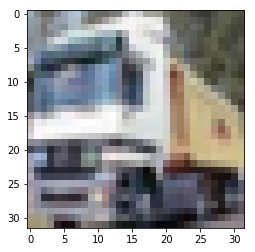

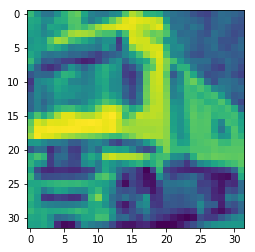

In [32]:
plt.imshow(x_train[1])
plt.show()

# plt.imshow(x_train_gray[1,:,:,0], cmap='gray')
# plt.show()

plt.imshow(x_train_gray[1])
plt.show()

In [33]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [34]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_labels

10

In [35]:
# image dimensions (assumed square)
image_size = x_train_gray.shape[1]
input_size = image_size * image_size
# for mlp, the input dim is a vector, so we reshape
print(x_train_gray.shape)
x_train_gray = np.reshape(x_train_gray, [-1, input_size])
print(x_train_gray.shape)
# we train our network using float data
x_train_gray = x_train_gray.astype('float32') / 255
x_test_gray = np.reshape(x_test_gray, [-1, input_size])
x_test_gray = x_test_gray.astype('float32') / 255
num_labels

(50000, 32, 32)
(50000, 1024)


10

In [36]:
y_train.shape

(50000, 10)

In [37]:
num_labels

10

In [0]:
# network parameters
batch_size = 128
hidden_units = 256

#### First Iteration
Model:
- 3 layers
- MLP
- Weights Initializer: (Default) Glorot_uniform
- Activation: ReLU
- Final Activation: softmax
- Regularization: None
- Optimizer: SGD
- Loss function: cross-entropy

In [0]:
# this is 3-layer MLP with ReLU. No regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
To

In [0]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Epoch 1/20
50000/50000 [==============================] - 3s 60us/sample - loss: 2.1600 - acc: 0.2117
Epoch 2/20
50000/50000 [==============================] - 3s 55us/sample - loss: 2.0576 - acc: 0.2669
Epoch 3/20
50000/50000 [==============================] - 3s 54us/sample - loss: 2.0132 - acc: 0.2852
Epoch 4/20
50000/50000 [==============================] - 3s 55us/sample - loss: 1.9831 - acc: 0.3003
Epoch 5/20
50000/50000 [==============================] - 3s 53us/sample - loss: 1.9576 - acc: 0.3113
Epoch 6/20
50000/50000 [==============================] - 3s 53us/sample - loss: 1.9334 - acc: 0.3213
Epoch 7/20
50000/50000 [==============================] - 3s 51us/sample - loss: 1.9100 - acc: 0.3309
Epoch 8/20
50000/50000 [==============================] - 3s 53us/sample - loss: 1.8883 - acc: 0.3384
Epoch 9/20
50000/50000 [==============================] - 3s 51us/sample - loss: 1.8689 - acc: 0.3462
Epoch 10/20
50000/50000 [==============================] - 3s 53us/sample - loss: 

#### Second Iteration
Model:
- 3 layers
- MLP
- Activation: ReLU
- Final Activation: softmax
- Regularization: L2(0.1) -> L2(0.01) -> L2(0.001) -> L2(0.0001)
- Optimizer: SGD
- Loss function: cross-entropy

In [0]:
# Regularizer
kernel_regularizer = l2(0.1)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [0]:
# Regularizer
kernel_regularizer = l2(0.01)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [0]:
# Regularizer
kernel_regularizer = l2(0.001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_12 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

@ L2(0.0001): peak test and training accuracy for training and test data

#### Explanation
Unknown as of the moment!

In [0]:
# Regularizer
kernel_regularizer = l2(0.00001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [0]:
# Regularizer
kernel_regularizer = l2(0.000001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_18 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [0]:
# Regularizer
kernel_regularizer = l2(0.000000001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

#### Third Iteration
Model:
- 3 layers
- MLP
- Activation: ReLU
- Final Activation: softmax
- Regularization: Dropout = 0.2 -> 0.4 -> 0.5 -> 0.6 -> 0.8
- Optimizer: SGD
- Loss function: cross-entropy

In [0]:
# Dropout Regularizer
dropout = 0.1

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)               

In [0]:
# Dropout Regularizer
dropout = 0.2

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_28 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)               

In [0]:
# Dropout Regularizer
dropout = 0.4

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_30 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_31 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

In [0]:
# Dropout Regularizer
dropout = 0.5

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_33 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

In [0]:
# Dropout Regularizer
dropout = 0.6

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_36 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_37 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

In [0]:
# Dropout Regularizer
dropout = 0.8

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_39 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_40 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

#### Fourth Iteration
Model:
- 3 layers
- MLP
- Activation: ReLU
- Final Activation: softmax
- Regularization: Data Augmentation
  - Horizontal Flip
  - Vertical Flip
  - Rotation range
  - Width shift range
  - Height shift range
- Optimizer: SGD
- Loss function: cross-entropy

In [0]:
# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
data_augmentation = True
epochs = 20
max_batches = len(x_train) / batch_size
# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # train the network no data augmentation
    x_train_gray = np.reshape(x_train_gray, [-1, input_size])
    model.fit(x_train_gray, y_train, epochs=epochs, batch_size=batch_size)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    # we need [width, height, channel] dim for data aug
    x_train_gray = np.reshape(x_train_gray, [-1, image_size, image_size, 1])
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5.0,  # randomly rotate images in the range (deg 0 to 180)
        width_shift_range=2.0,  # randomly shift images horizontally
        height_shift_range=2.0,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_gray)
    for e in range(epochs):
        batches = 0
        for x_batch, y_batch in datagen.flow(x_train_gray, y_train, batch_size=batch_size):
            x_batch = np.reshape(x_batch, [-1, input_size])
            model.fit(x_batch, y_batch, verbose=0)
            batches += 1
            
            if batches >= max_batches:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break
        print("Epoch %d/%d" % (e+1, epochs))

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_63 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_64 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_65 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

#### Fifth Iteration
Model:
- 3 layers
- MLP
- Activation: ReLU
- Final Activation: softmax
- Regularization: 
  - Data Augmentation
    - Horizontal Flip
    - Vertical Flip
    - Rotation range
    - Width shift range
    - Height shift range
  - Dropout: 0.2
  - L2: 0.0001
- Optimizer: SGD
- Loss function: cross-entropy

Combined the best of each regularizer algorithm

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)
dropout = 0.2

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the network
data_augmentation = True
epochs = 20
max_batches = len(x_train) / batch_size
# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # train the network no data augmentation
    x_train_gray = np.reshape(x_train_gray, [-1, input_size])
    model.fit(x_train_gray, y_train, epochs=epochs, batch_size=batch_size)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    # we need [width, height, channel] dim for data aug
    x_train_gray = np.reshape(x_train_gray, [-1, image_size, image_size, 1])
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5.0,  # randomly rotate images in the range (deg 0 to 180)
        width_shift_range=2.0,  # randomly shift images horizontally
        height_shift_range=2.0,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_gray)
    for e in range(epochs):
        batches = 0
        for x_batch, y_batch in datagen.flow(x_train_gray, y_train, batch_size=batch_size):
            x_batch = np.reshape(x_batch, [-1, input_size])
            model.fit(x_batch, y_batch, verbose=0)
            batches += 1
            
            if batches >= max_batches:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break
        print("Epoch %d/%d" % (e+1, epochs))

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_69 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_70 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)              

It yielded a result less than the individual's algorithm's best accuracy.

#### Summary
It is better to use a single regularizer.

Hypothesis: Regularizer penalizes the algorithm so that it would not overfit. By combining two regularizers, we penalize the algorithm in such a way that it is too much. Thus, the result is an underfitted algorithm

### Changing the SGD algorithm

In [0]:

# Load cifar10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_gray = np.dot(x_train[:,:,:,:3], [0.299, 0.587, 0.114])
x_test_gray = np.dot(x_test[:,:,:,:3], [0.299, 0.587, 0.114])

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train_gray.shape[1]
input_size = image_size * image_size

# for mlp, the input dim is a vector, so we reshape
print(x_train_gray.shape)
x_train_gray = np.reshape(x_train_gray, [-1, input_size])
print(x_train_gray.shape)
# we train our network using float data
x_train_gray = x_train_gray.astype('float32') / 255
x_test_gray = np.reshape(x_test_gray, [-1, input_size])
x_test_gray = x_test_gray.astype('float32') / 255

num_labels

(50000, 32, 32)
(50000, 1024)


10

#### First Iteration
Model:
- 3 layers
- MLP
- Activation: ReLU
- Final Activation: softmax
- Regularization: L2: 0.0001
- Optimizer: adagrad
- Loss function: cross-entropy

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_72 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_73 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_74 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

#### Second Iteration
Model:
- 3 layers
- MLP
- Activation: ReLU
- Final Activation: softmax
- Regularization: L2: 0.0001
- Optimizer: rmsprop
- Loss function: cross-entropy

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_75 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_76 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_77 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

#### Third Iteration
Model:
- 3 layers
- MLP
- Activation: ReLU
- Final Activation: softmax
- Regularization: L2: 0.0001
- Optimizer: adam
- Loss function: cross-entropy

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_78 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_79 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_80 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

#### Summary
Just as discussed, adam really performs better compared to others

### Epoch

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=300,
      shuffle=True, verbose=1, callbacks=[es], validation_split=0.33)


# model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_81 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_82 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_83 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

It stopped prematurely, let's add patience.

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=300,
      shuffle=True, verbose=1, callbacks=[es], validation_split=0.33)


# model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_84 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_85 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_86 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

In [0]:
x_train_gray[1]

The training accuracy continuously increase, however the validation accuracy gets lower and lower after 34 epochs. 
And it doesnt stop even if validation accuracy is getting lower.

Make patience small

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network

# simple early stopping
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=300,
      shuffle=True, verbose=1, callbacks=[es], validation_split=0.33)


# model.fit(x_train_gray, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_87 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_88 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_89 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

From this, we can see some validation accuracy that is greater than the current validation accuracy. So, lets use a model checkpoint to get the best model of all our training





In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network

# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=300,
      shuffle=True, verbose=1, callbacks=[es, mc], validation_split=0.33)


saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_90 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_91 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_92 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

Now, this is the best accuracy for MLP based on my experiment.

#### Complying to the Requirements


In [21]:
# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
# this is the output for one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=100,
      shuffle=True, verbose=1, callbacks=[es, mc], validation_split=0.33)


saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_18 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

Since it didn't reach the epoch=100, which means we still have some time, so we can decrease batch size.

In [23]:
# Changed batch_size
batch_size = 64

# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
# this is the output for one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)


model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=100,
      shuffle=True, verbose=1, callbacks=[es, mc], validation_split=0.33)


saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

It overfitted too early in the epoch; which means that our regularizer is not effective anymore. Let's change it into dropout, while adding dataset augmentation.

In [24]:
# Changed batch_size
batch_size = 64

# Changed into dropout
dropout = 0.2

# this is 3-layer MLP with ReLU. 
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()

# simple early stopping
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
data_augmentation = True
epochs = 50
max_batches = len(x_train) / batch_size
# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # train the network no data augmentation
    x_train_gray = np.reshape(x_train_gray, [-1, input_size])
    model.fit(x_train_gray, y_train, epochs=epochs, batch_size=batch_size)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    # we need [width, height, channel] dim for data aug
    x_train_gray = np.reshape(x_train_gray, [-1, image_size, image_size, 1])
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5.0,  # randomly rotate images in the range (deg 0 to 180)
        width_shift_range=2.0,  # randomly shift images horizontally
        height_shift_range=2.0,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_gray)
    for e in range(epochs):
        batches = 0
        for x_batch, y_batch in datagen.flow(x_train_gray, y_train, batch_size=batch_size):
            x_batch = np.reshape(x_batch, [-1, input_size])
            model.fit(x_batch, y_batch, verbose=0)
            batches += 1
            
            if batches >= max_batches:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break
        print("Epoch %d/%d" % (e+1, epochs))

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_29 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_30 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)              

Dropout + Dataset Augmentation didn't work.

In [39]:
# Changed batch_size
batch_size = 64

# Regularizer
dropout = 0.2

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
# this is the output for one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)


model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=100,
      shuffle=True, verbose=1, callbacks=[es, mc], validation_split=0.33)


saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_37 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_38 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)             

It didn't improve too. Let's just try decreasing the batch size further

In [40]:
# Changed batch_size v2
batch_size = 32

# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
# this is the output for one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)


model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=100,
      shuffle=True, verbose=1, callbacks=[es, mc], validation_split=0.33)


saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_41 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_42 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_43 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

It didn't improve again. Let's try increasing the penalty so that it won't overfit @ early stage.

In [41]:
# Changed batch_size v2
batch_size = 128

# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
# this is the output for one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)


model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=100,
      shuffle=True, verbose=1, callbacks=[es, mc], validation_split=0.33)


saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_45 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_46 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_47 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)              

Repeat past computation

In [42]:
# Changed batch_size v2
batch_size = 128

# Regularizer
kernel_regularizer = l2(0.0001)

# this is 3-layer MLP with ReLU. With L2 Regularizer
model = Sequential()
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
model.add(Dense(hidden_units, kernel_regularizer=kernel_regularizer))
model.add(Activation('relu'))
# this is the output for one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# simple early stopping
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)


model.fit(x_train_gray, y_train, batch_size=batch_size, nb_epoch=100,
      shuffle=True, verbose=1, callbacks=[es, mc], validation_split=0.33)


saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_gray, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_49 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_50 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_51 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)              

Still is the best model.